In [115]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import morphology
import cv2

import _image_processing

In [121]:
import importlib
importlib.reload(_image_processing)

<module '_image_processing' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\_image_processing.py'>

In [87]:
a = np.vstack((500*(np.cos(np.linspace(0, 2*np.pi, 10000, endpoint=False)))+600, 
               500*(np.sin(np.linspace(0, 2*np.pi, 10000, endpoint=False)))+600)).astype(int)

In [88]:
im = np.zeros((1200, 1200))
im[tuple(a)] = 1

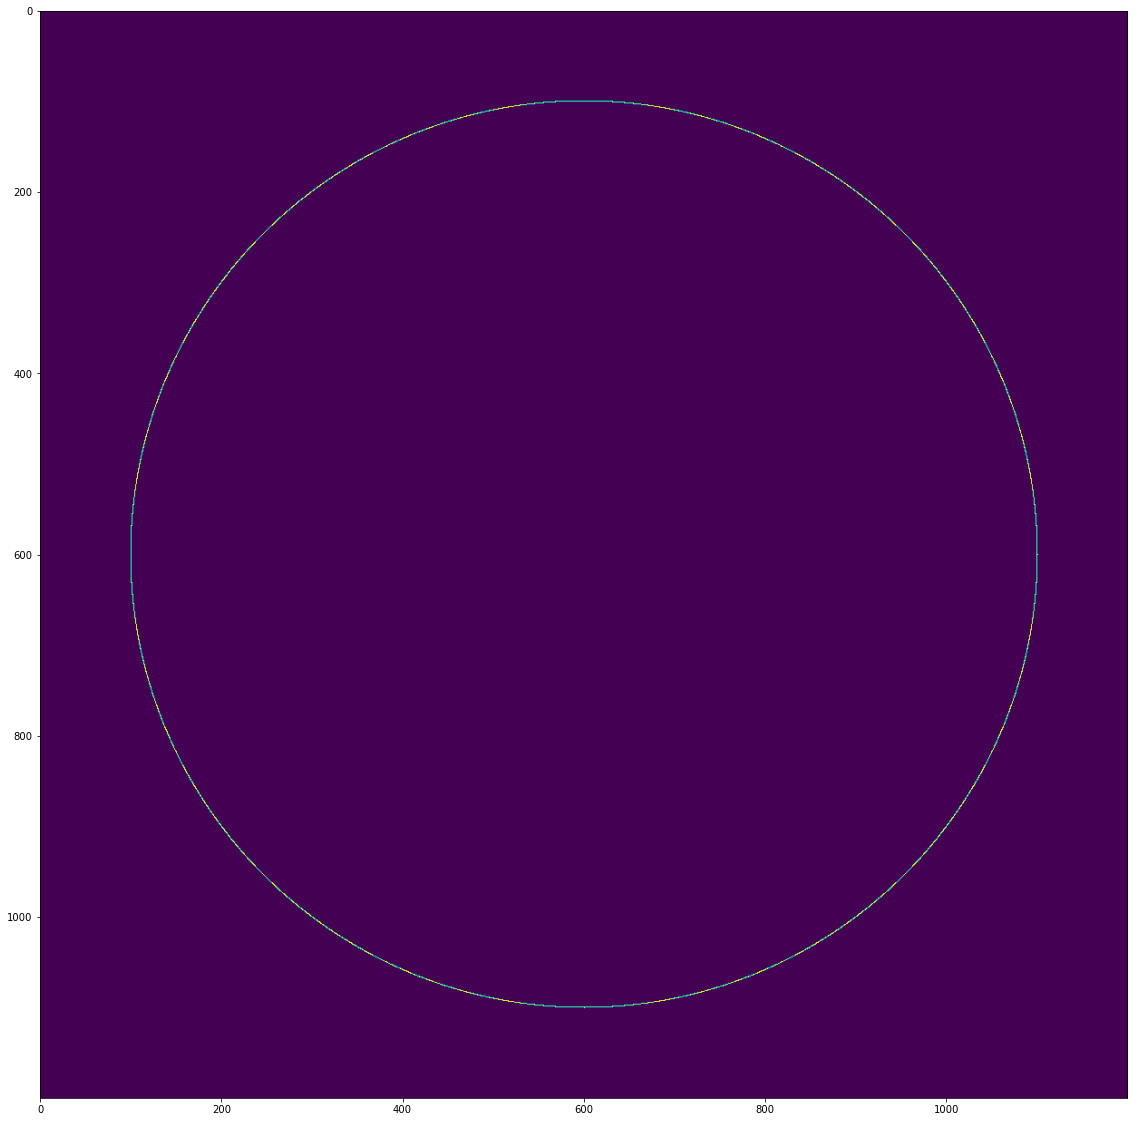

In [89]:
plt.figure(figsize=(20, 20))
plt.imshow(im)

In [113]:
%timeit im_morph = morphology.flood_fill(im, (600, 600), 1, connectivity=0)

23.7 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


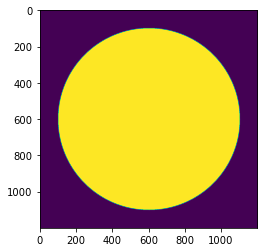

In [102]:
plt.imshow(im_morph)

In [114]:
%%timeit

im_cv = im.copy().astype(np.uint8)
h, w = im.shape
mask = np.zeros((h+2, w+2), np.uint8)
_ = cv2.floodFill(im_cv, mask, seedPoint=(600, 600), newVal=1, flags=4)

5.6 ms ± 330 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


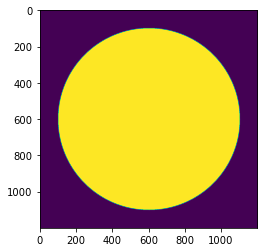

In [111]:
plt.imshow(im_cv)

In [122]:
im_ff = _image_processing.flood_fill(im)
im_ffcv = _image_processing.flood_fill_cv(im)

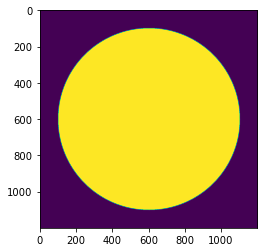

In [123]:
plt.imshow(im_ff)

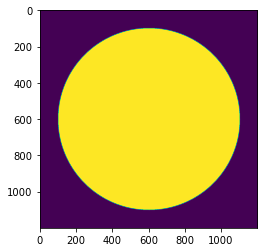

In [120]:
plt.imshow(im_ffcv)

In [124]:
%timeit _image_processing.flood_fill(im)

77.1 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [125]:
%timeit _image_processing.flood_fill_cv(im)

8.09 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
